## Capacity and under/overfitting
I denne opgave ville vi se nærmer på under/overfitting, hvordan det opstår, hvilke konsekvenser der kan have for ens model, samt hvilke tiltag man kan tage for at forhindre det.


Iterating...degrees= [1, 4, 15]
  degree=   1, score_mean=-0.41,  PolynomialFeatures(degree=1, include_bias=False)
    CV sub-scores:  mean = -0.41,  std = 0.43
      CV fold 0  =>  score = -1.2
      CV fold 1  =>  score = -0.2
      CV fold 2  =>  score = -0.044
      CV fold 3  =>  score = -0.36
      CV fold 4  =>  score = -0.28
      CV fold 5  =>  score = -0.3
      CV fold 6  =>  score = -0.18
      CV fold 7  =>  score = -0.0086
      CV fold 8  =>  score = -0.25
      CV fold 9  =>  score = -1.3
  degree=   4, score_mean=-0.04,  PolynomialFeatures(degree=4, include_bias=False)
    CV sub-scores:  mean = -0.043,  std = 0.071
      CV fold 0  =>  score = -0.25
      CV fold 1  =>  score = -0.042
      CV fold 2  =>  score = -0.027
      CV fold 3  =>  score = -0.029
      CV fold 4  =>  score = -0.0049
      CV fold 5  =>  score = -0.0049
      CV fold 6  =>  score = -0.019
      CV fold 7  =>  score = -0.038
      CV fold 8  =>  score = -0.012
      CV fold 9  =>  score = -0.00

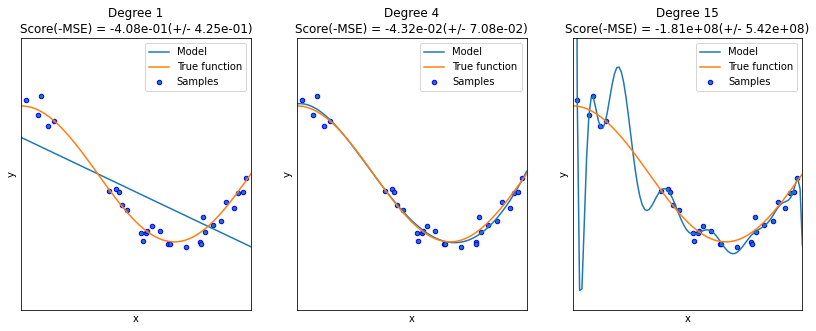

OK


In [1]:
# TODO: code review 
#assert False, "TODO: remove me, and review this code"

# NOTE: code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData(n_samples = 30):
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y

np.random.seed(0)

X, y = GenerateData()
degrees = [1, 4, 15]
    
print("Iterating...degrees=",degrees)
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    
    score_mean = scores.mean()
    print(f"  degree={degrees[i]:4d}, score_mean={score_mean:4.2f},  {polynomial_features}")   

    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])
    
    # Plotting details
    plt.plot(X_test, y_pred          , label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nScore(-MSE) = {:.2e}(+/- {:.2e})".format(degrees[i], scores.mean(), scores.std()))
    
    # CEF: loop added, prints each score per CV-fold. 
    #      NOTICE the sub-means when degree=15!
    print(f"    CV sub-scores:  mean = {scores.mean():.2},  std = {scores.std():.2}")
    for i in range(len(scores)):
        print(f"      CV fold {i}  =>  score = {scores[i]:.2}")
        
plt.show()
print('OK')

### Qa) Resumé af kodecelle
I opgaven er der blevet givet en kodecelle. Denne ses ovenfor. Opgaven bestod derefter i at give et overblik over, hvad koden gør. Dette ses nedenfor.

I starten bliver dataen genereret ved at køre funktionen `GenerateData()`. Denne skaber nogle tilfælde normalfordelte datasamples, som lægges ind i en cosinus funktion for at generer et sandhedsmatrix med et tilfældigt offset (kunne simulerer støj). <br>
De grader af polynomier, som vil blive undersøgt, fastlægges i variablen `degrees`. Et for-loop startes, som itereres igennem 3 gange. Første gang skaber den en lineær regression af første grad, og forsøger at fitte modellen til dataen. Der bliver anvendt `PolynomialFeatures()` funktionen, som anvendes til at lave en ny matrix, som indeholder alle mulige kombinationer af polynomier afhængigt af den grad, der gives som parameter. Der bliver desuden genereret et plot for modellen. Processen gentages for alle værdier i variablen `degrees`, dvs. med 4. og 15. grads polynomier.<br>
Det ses ud fra figurerne at ved 1. grads polynomiet er der en tydelig underfitting og tydelig overfitting ved 15. grads polynomiet. Ved 4. grads polynomiet passer modellen rigtig godt med "True function", som er en cosinus med tillagt støj.

### Qb) Forklaring af kapacitet, over- og underfitting

**Kapacitet:**<br>
Kapacitet er et blødt begreb, som beskriver hvor fleksibel og kompleks en model potentielt kan være. Kapaciteten af en model afhænger af hvilken type model der anvendes. Eksempler på måder at kvantificere kapaciteter:
* Lineær regression: Kapaciteten afhænger af graden af polynomiet.
* K-Nearest Neighbours: Kapaciteten afhænger af K.
* Neurale netværk: Kapaciteten afhænger af mængden af neuroner og lag.

**Underfitting:**<br>
En underfitted model vil give en dårlig prædiktion, fordi den ikke er fleksibel nok til at passe på dataen. Hvis man kigger på "Degree 1" figuren fra forrige opgave, er den underfitted, fordi den forsøger at fitte en ret linje til en cosinus funktion. Ved underfitting vil man se, at kapaciteten for ens model er for lav.

**Overfitting:**<br>
En overfitted model er det modsatte af en underfitted. Den vil være meget fleksibel i forhold til at finde en prædiktion, og modellen passer rigtig godt på træningsdataen. Udfordringen kommer, når den skal prædiktere på ny data, da det ikke nødvendigvis følger samme tendens som træningsdaten. En overfitted model vil forsøge at få det til at passe for godt med træningsdataen. Ved overfitting vil man se, at kapaciteten for ens model er for høj.

**Eksempel med polynomer<br>**
Det blev set i opgave Qa) at 1. grads polynomiet var underfitted, da dens kapacitet (grad) ikke var høj nok.<br>
Det blev set i opgave Qa) at 4. grads polynomiet var et godt fit, da dens kapacitet var passende.<br>
Det blev set i opgave Qa) at 15. grads polynomiet var overfitted, da dens kapacitet (grad) var for høj.

### Qc) Scorings metode
Der bliver stillet spørgsmål til hvorfor der anvendes `neg_mean_squared_error` i stedet for bare `mean_squared_error`. Dette skyldes at der arbejdes med en score funktion, hvortil det ønskes at jo højere score ens model har, jo bedre er den. Ved almindelig `mean_squared_error` (som bruges til cost functions) angiver en højere værdi at modellen performer dårligere. Ved at flippe fortegnet, kan `mean_squared_error` anvendes som score function.

Der bliver desuden spurgt ind til, hvad der sker, hvis `scoring` ændres til `mean_squared_error`. Dette er forsøgt i kodecellen nedenfor, hvortil det ses, at en `ValueError` bliver raised. Dette skyldes at funktionen kun godtager visse tekst-strenge, den samme exception bliver raised, hvis man angiver `scoring="ITMAL"`. De mulige `scoring` værdier kan ses ved at køre `sorted(sklearn.metrics.SCORERS.keys())`. 

Ved anvendelse af `neg_mean_squared_error` vil de teoretiske minimum og maksimum score værdier ligge mellem $[-\infty;0]$, da en normal `mean_squared_error` ligger mellem $[0;\infty]$.

Til sidst bliver der spurgt ind til hvorfor 15. grads polynomiet har en score, som er meget lille ($-1.8\cdot10^8$). Dette skyldes at modellen passer rigtig godt med træningsdataen, men passer meget dårligt med valideringssættet. Den vil derfor være rigtig god til at prædiktere træningsdataen, men dårlig til at prædiktere ny data.


In [2]:
# TODO: code review 
#assert False, "TODO: remove me, and review this code"

# NOTE: code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData(n_samples = 30):
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y

np.random.seed(0)

X, y = GenerateData()
degrees = [1, 4, 15]
    
print("Iterating...degrees=",degrees)
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="mean_squared_error", cv=10)
    
    score_mean = scores.mean()
    print(f"  degree={degrees[i]:4d}, score_mean={score_mean:4.2f},  {polynomial_features}")   

    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])
    
    # Plotting details
    plt.plot(X_test, y_pred          , label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nScore(-MSE) = {:.2e}(+/- {:.2e})".format(degrees[i], scores.mean(), scores.std()))
    
    # CEF: loop added, prints each score per CV-fold. 
    #      NOTICE the sub-means when degree=15!
    print(f"    CV sub-scores:  mean = {scores.mean():.2},  std = {scores.std():.2}")
    for i in range(len(scores)):
        print(f"      CV fold {i}  =>  score = {scores[i]:.2}")
        
plt.show()
print('OK')

Iterating...degrees= [1, 4, 15]


ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.